In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv(r'C:\Users\camil\OneDrive\Escritorio\Universidad\Analisis de datos\Semana 5\Titanic-Dataset.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


       PassengerId         Age       SibSp       Parch        Fare
count   891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000   29.699118    0.523008    0.381594   32.204208
std     257.353842   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000   20.125000    0.000000    0.000000    7.910400
50%     446.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000   38.000000    1.000000    0.000000   31.000000
max     891.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    

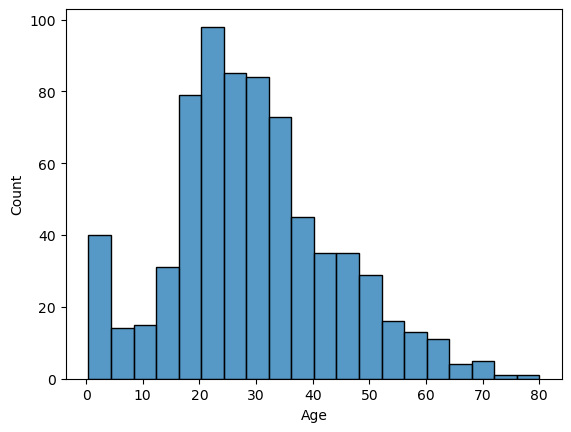

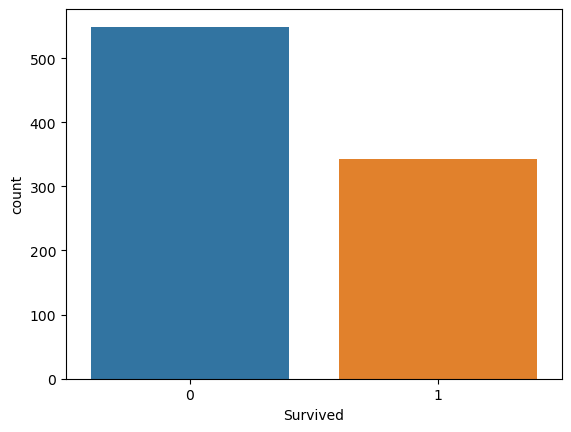

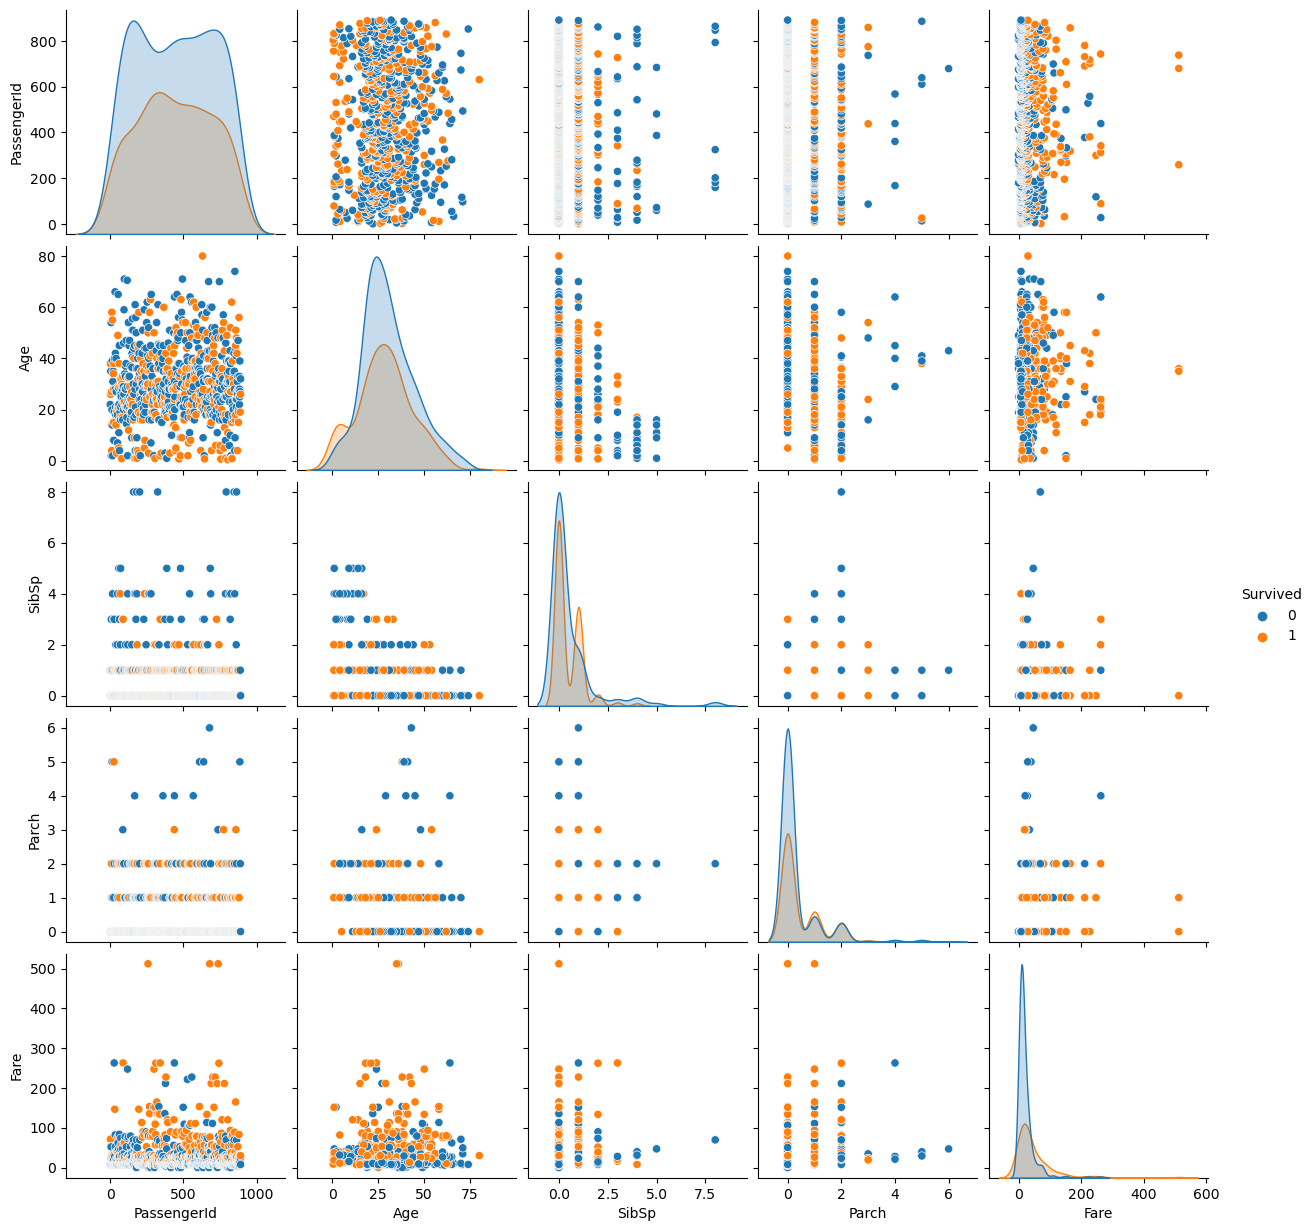

In [31]:
from sklearn.preprocessing import LabelEncoder


print(dataset.describe())

print(dataset.info())

sns.histplot(dataset['Age'])
plt.show()

sns.countplot(x='Survived', data=dataset)
plt.show()

sns.pairplot(dataset, hue='Survived')
plt.show()

# Ajusto valores faltantes
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

#Transformo variables
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])






In [54]:
#División de datos en Train y Test
from sklearn.model_selection import train_test_split

X = dataset.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = dataset['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [57]:

dataset.shape

dataset.describe()




,PassengerId,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

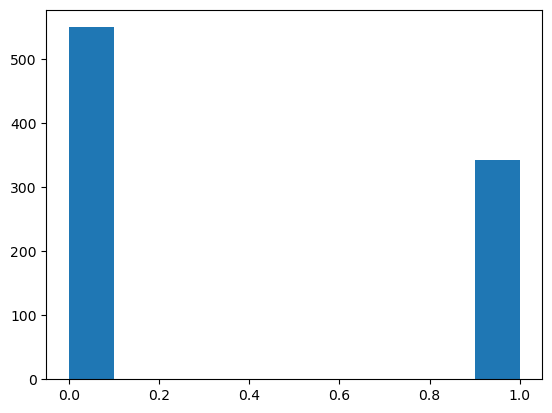

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

plt.hist(dataset.Survived)

   PassengerId Survived Pclass  \
0            1        0      3   
1            2        1      1   
2            3        1      3   
3            4        1      1   
4            5        0      3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
Accuracy: 0.7247191011235955


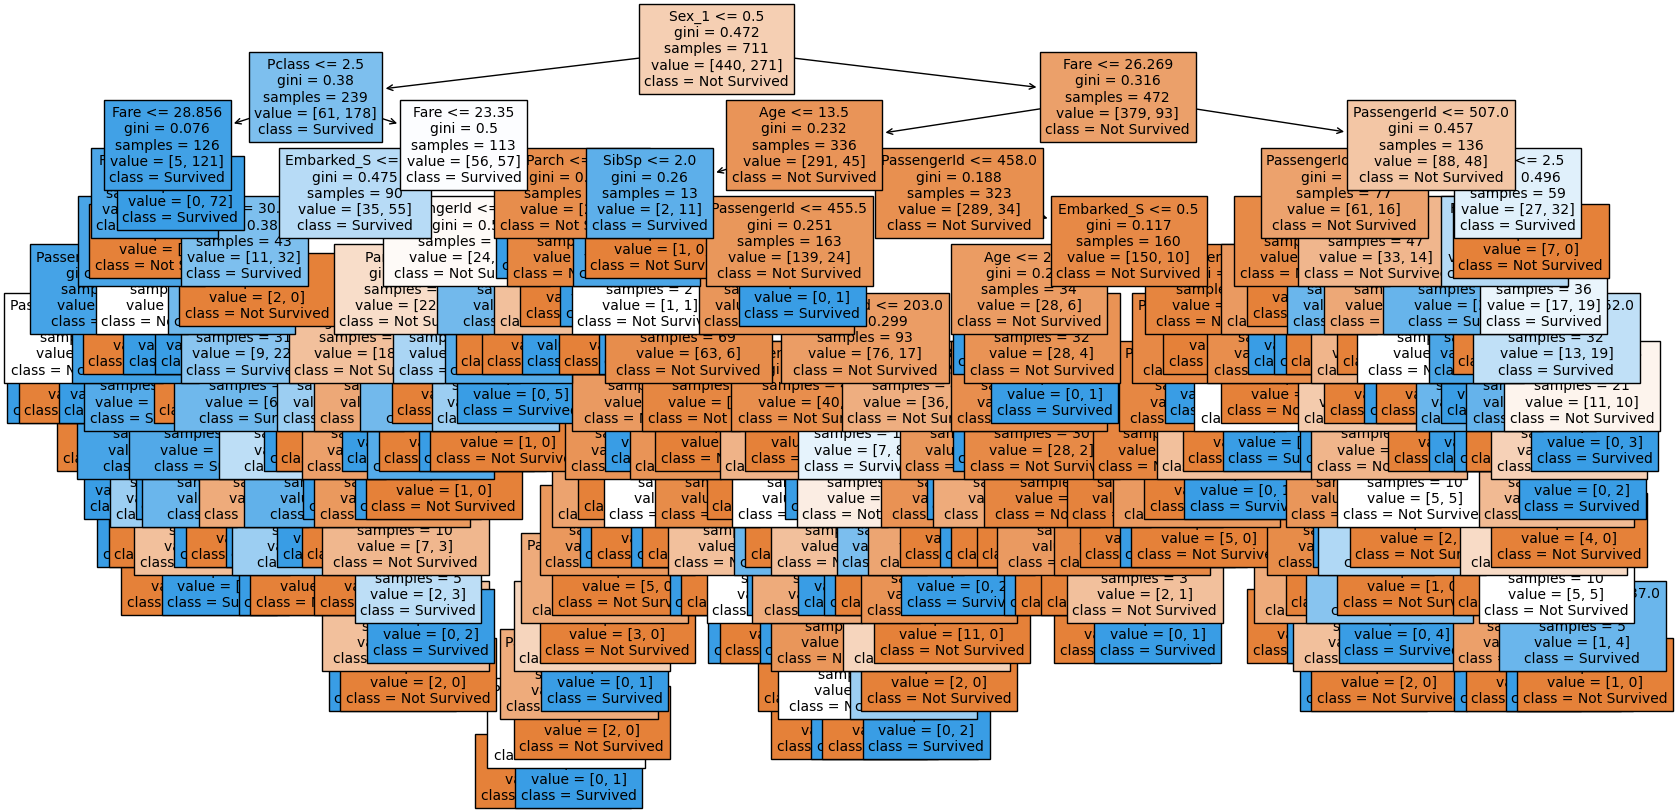

In [71]:
print(dataset.head())

# Preprocesar los datos
dataset.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
dataset.dropna(inplace=True)

# Dividir los datos en características (X) y etiqueta (y)
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

# Codificar variables categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[['Sex', 'Embarked']])

# Convertir X_encoded a un DataFrame y añadirlo a X
encoded_columns = encoder.get_feature_names_out(['Sex', 'Embarked'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns, index=X.index)

# Eliminar las columnas originales y concatenar las codificadas
X.drop(['Sex', 'Embarked'], axis=1, inplace=True)
X = pd.concat([X, X_encoded_df], axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], fontsize=10)
plt.show()

NameError: name 'arbol' is not defined